📊 Desafio 51 — Análise de Pedidos de Clientes

📂 Dataset: Clique aqui para baixar o CSV

Este conjunto de dados fictício representa compras feitas por clientes em uma loja online entre os anos de 2022 e 2023, com informações sobre o valor total, frete, categoria e forma de pagamento.

🔍 Tarefas:

Tratamento de Dados

    Verifique e trate possíveis valores ausentes ou duplicados no dataset.

Análise Comum

    Qual foi a categoria de produto com maior valor total acumulado em vendas?

Gráfico

    Crie um gráfico de barras exibindo a média do valor total dos pedidos por forma de pagamento.

Machine Learning (Simples)

    Crie uma variável binária chamada frete_gratis que indica se o frete foi igual a 0.
    Em seguida, treine um modelo simples de classificação (LogisticRegression ou RandomForestClassifier) para prever se um pedido terá frete grátis com base nas demais variáveis disponíveis.

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [66]:
df = pd.read_csv("dia_51_pedidos_clientes.csv")
df.head()

,cliente_id,data_pedido,valor_total,frete,categoria,forma_pagamento
0,C0019,2023-09-23,742.84,33.36,Casa,Transferência
1,C0026,2022-03-23,122.14,33.11,Beleza,Transferência
2,C0032,2023-07-23,764.05,12.05,Esportes,Transferência
3,C0041,2022-01-27,690.67,46.17,Eletrônicos,Pix
4,C0009,2023-12-27,883.77,10.11,Beleza,Transferência


In [67]:
#Verifique e trate possíveis valores ausentes ou duplicados no dataset.
df.drop_duplicates()
df.isnull().sum()

cliente_id         0
data_pedido        0
valor_total        0
frete              0
categoria          0
forma_pagamento    0
dtype: int64

In [68]:
#Qual foi a categoria de produto com maior valor total acumulado em vendas?
categoriaTotalValor = df.groupby("categoria")["valor_total"].sum().sort_values(ascending=False)
print(categoriaTotalValor)

categoria
Esportes       34588.37
Roupas         32896.58
Eletrônicos    31478.21
Beleza         30358.48
Casa           28328.44
Name: valor_total, dtype: float64


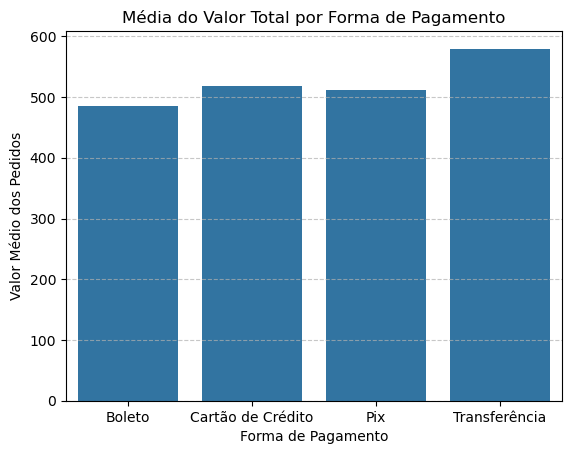

In [69]:
#Crie um gráfico de barras exibindo a média do valor total dos pedidos por forma de pagamento.
mediaTotalPagamento = df.groupby("forma_pagamento")["valor_total"].mean()
sns.barplot(data=mediaTotalPagamento)
plt.title('Média do Valor Total por Forma de Pagamento')
plt.xlabel('Forma de Pagamento')
plt.ylabel('Valor Médio dos Pedidos')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [80]:
#Crie uma variável binária chamada frete_gratis que indica se o frete foi igual a 0.
#Em seguida, treine um modelo simples de classificação (LogisticRegression ou RandomForestClassifier) para prever se um pedido terá frete grátis com base nas demais variáveis disponíveis.
df["frete_gratis"] = (df["frete"] == 0).astype(int)

X = df.drop(["frete_gratis", "cliente_id", "data_pedido"], axis=1)
y = df["frete_gratis"]

le_cat = LabelEncoder()
le_pag = LabelEncoder()
df["categoria"] = le_cat.fit_transform(df["categoria"])
df["forma_pagamento"] = le_pag.fit_transform(df["forma_pagamento"])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print(f"Acurácia: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

importances = pd.Series(modelo.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False))

Acurácia: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90

valor_total        0.0
frete              0.0
categoria          0.0
forma_pagamento    0.0
dtype: float64
